In [77]:
import numpy as np
import pandas as pd
import geopandas as gpd
import fiona
import folium
import matplotlib.pyplot as plt

In [2]:
# Read in bid_buy vendor file
bids_data = pd.read_csv('can-summer-2023/data/raw/vendors/illinois_bidbuy_vendors_as_of_20230617.csv')
bids_data.head()

,Vendor ID,Vendor Name,Address,City,State,Postal Code,Contact Name,Phone
0,V00027107,A & A Lawn Care,P.O. Box 784,Rockford,IL,61105,justin lopez,8159046299
1,V00018576,Aircraft Specialists Inc,6005 Propeller Lane,sellenburg,NJ,471712,Jeff Davis,8122464696
2,V00017020,"Bridges Healthcare Consulting, Inc",1511 N CONVENT 700-304,BOURBANNAIS,IL,60914,Anneleah Bridges,8159532422
3,V00021774,Crosswinds Center for Personal and Profession...,3411-c North Kennicott Ave,Arlington Heights,IL,60004,Mitchell Hicks,8337107770
4,V00017320,"Diamond Buildings LLC, Barnstormer Sales",1101 Private Rd 298,clark,MO,65243,titus chupp,2175894987


In [5]:
# Change the Postal Code to a str
bids_data = pd.io.parsers.read_csv('can-summer-2023/data/raw/vendors/illinois_bidbuy_vendors_as_of_20230617.csv', dtype={'Postal Code': 'str'})

In [6]:
bids_data.columns

Index(['Vendor ID', 'Vendor Name', 'Address', 'City', 'State', 'Postal Code',
       'Contact Name', 'Phone'],
      dtype='object')

In [7]:
bids_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27472 entries, 0 to 27471
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Vendor ID     27472 non-null  object
 1   Vendor Name   27472 non-null  object
 2   Address       27471 non-null  object
 3   City          27464 non-null  object
 4   State         27471 non-null  object
 5   Postal Code   27467 non-null  object
 6   Contact Name  20408 non-null  object
 7   Phone         20408 non-null  object
dtypes: object(8)
memory usage: 1.7+ MB


In [8]:
#  We used the .isnull() method to detect missing values for each column in the dataset.
bids_data.isnull().sum()

Vendor ID          0
Vendor Name        0
Address            1
City               8
State              1
Postal Code        5
Contact Name    7064
Phone           7064
dtype: int64

In [9]:
# Examnined missing values by percentage distribution
bids_data.isnull().mean()

Vendor ID       0.000000
Vendor Name     0.000000
Address         0.000036
City            0.000291
State           0.000036
Postal Code     0.000182
Contact Name    0.257135
Phone           0.257135
dtype: float64

In [10]:
# Subtacted total from number of missing null (5) and the percentage that is not missing (99.98%)
(27472-5)/27472

0.9998179965055329

In [11]:
# Drop null values from Postal Code Column
bids_data = bids_data.dropna(subset='Postal Code')

In [12]:
#Verified no more null values in Postal Code
bids_data.isnull().sum()

Vendor ID          0
Vendor Name        0
Address            1
City               8
State              1
Postal Code        0
Contact Name    7059
Phone           7059
dtype: int64

In [13]:
# Filters the bid dataframe to only 'IL' State
bids_data = bids_data.query("`State` == 'IL'")

In [14]:
bids_data.head()

,Vendor ID,Vendor Name,Address,City,State,Postal Code,Contact Name,Phone
0,V00027107,A & A Lawn Care,P.O. Box 784,Rockford,IL,61105,justin lopez,8159046299
2,V00017020,"Bridges Healthcare Consulting, Inc",1511 N CONVENT 700-304,BOURBANNAIS,IL,60914,Anneleah Bridges,8159532422
3,V00021774,Crosswinds Center for Personal and Profession...,3411-c North Kennicott Ave,Arlington Heights,IL,60004,Mitchell Hicks,8337107770
5,V00034790,Diamond cut landscaping inc,930 foran lane,Aurora,IL,60506,Lashawn Herndon,6303971092
9,V00010068,ICE Factor,11 West Main St Ste 304,Carpentersville,IL,60110,Russ Kellogg,8478440814


In [15]:
bids_data["Postal Code"].unique()

array(['61105  ', '60914', '60004', ..., '61776', '61727 ', '61944 Uni'],
      dtype=object)

In [16]:
ps = list(bids_data["Postal Code"])


['61105  ',
 '60914',
 '60004',
 '60506',
 '60110',
 '62948',
 '60201',
 '60563',
 '62467',
 '60445',
 '60154 Uni',
 '60126',
 '60162',
 '60647',
 '60609',
 '60608 Uni',
 '60659 Uni',
 '60115',
 '62684',
 '62002',
 '60305 ',
 '60940',
 '60611',
 '61455',
 '62864',
 '62703',
 '60631 ',
 '60050',
 '60561',
 '60172 ',
 '60604',
 '61104',
 '60482',
 '60643',
 '60506',
 '60617',
 '60616',
 '60465',
 '60606',
 '60130',
 '60604',
 '61114',
 '60527',
 '60461',
 '60604 Uni',
 '60090',
 '61443',
 '60491',
 '60610',
 '60803',
 '60649',
 '60618',
 '62864',
 '60440',
 '60148',
 '60438',
 '60563',
 '60638',
 '60453',
 '60453',
 '60473',
 '60611',
 '60473',
 '60612',
 '60062',
 '60002 ',
 '61101 Uni',
 '60415',
 '60154',
 '60617',
 '61114',
 '62708',
 '60827',
 '60426',
 '61602',
 '60031',
 '60090',
 '62693',
 '61820',
 '60076 Uni',
 '60033',
 '60461',
 '60604',
 '60602',
 '60173',
 '60661',
 '60628',
 '60126',
 '60607',
 '62206 ',
 '62206',
 '60805',
 '62226',
 '60107-1519',
 '60104',
 '60632',
 '62

In [17]:
# Cleans the Postal Code to only have ZIP CODES 
bids_data['Postal Code'] = bids_data['Postal Code'].str.replace(' ', '')
bids_data['Postal Code'] = bids_data['Postal Code'].str.replace('IL', '')
bids_data['Postal Code'] = bids_data['Postal Code'].str.replace('Uni', '')
bids_data['Postal Code'] = bids_data['Postal Code'].str.slice(0, 5)

In [ ]:

len(bids_data['Vendor ID'].unique()) == len(bids_data)

In [21]:
bids_data_groupby = bids_data.groupby("Postal Code")[['Vendor ID']].count()

In [29]:
# Converted Postal Code Column to Str to be able to merge with illinois_zip_county dataset

bids_data_groupby['Postal Code'] = bids_data_groupby['Postal Code'].astype(str)
bids_data_groupby

,Postal Code,Vendor ID
0,06854,1
1,12345,1
2,21998,1
3,22314,1
4,29615,1
...,...,...
1137,83420,1
1138,90025,1
1139,Megan,1
1140,asdfa,1


In [30]:
illinois_zip_county = pd.read_csv('../IL_CEI/can-summer-2023/data/self_add/Illinois_zip_county.csv')
illinois_zip_county.head()

In [32]:
# Converted Zip Column to Str to be able to merge with bids_data_groupby dataframe
illinois_zip_county['Zip'] = illinois_zip_county['Zip'].astype(str)
illinois_zip_county

,Zip,County
0,60002,Lake
1,60004,Cook
2,60005,Cook
3,60010,Lake
4,60012,Mchenry
...,...,...
1292,62994,Jackson
1293,62995,Johnson
1294,62996,Pulaski
1295,62998,Union


In [33]:
# Merge both datasets to get County that appears on each dataset
bids_data_county = pd.merge(bids_data_groupby, illinois_zip_county, left_on = 'Postal Code', right_on = "Zip", how="inner")

In [42]:
bids_data_county

,Postal Code,Vendor ID,Zip,County
0,60002,17,60002,Lake
1,60004,35,60004,Cook
2,60005,37,60005,Cook
3,60010,57,60010,Lake
4,60012,9,60012,Mchenry
...,...,...,...,...
994,62990,4,62990,Alexander
995,62992,3,62992,Pulaski
996,62995,21,62995,Johnson
997,62996,3,62996,Pulaski


In [44]:
#Group vendor by county to have one county for each data 
bids_data_county_group = bids_data_county.groupby("County")[['Vendor ID']].count().reset_index()
bids_data_county_group 

,County,Vendor ID
0,Adams,11
1,Alexander,5
2,Bond,3
3,Boone,3
4,Brown,1
...,...,...
97,Whiteside,7
98,Will,28
99,Williamson,7
100,Winnebago,16


In [45]:
# Read in shapefile
# Downloaded from https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_county_5m.zip

shape_data = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_county_5m.zip")

In [46]:
# Filter to only counties in Illinois using StateFP column = 17
shape_data = shape_data.loc[(shape_data['STATEFP'] == "17")]

shape_data

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
3,17,101,00424252,0500000US17101,17101,Lawrence,06,963936864,5077783,"POLYGON ((-87.91028 38.57493, -87.90811 38.850..."
22,17,093,00424248,0500000US17093,17093,Kendall,06,829468028,5136619,"POLYGON ((-88.60349 41.71358, -88.60193 41.719..."
57,17,139,01784885,0500000US17139,17139,Moultrie,06,870123798,22102741,"POLYGON ((-88.81271 39.74049, -88.75784 39.739..."
74,17,049,00424226,0500000US17049,17049,Effingham,06,1239970330,3183217,"POLYGON ((-88.80532 39.21626, -88.47091 39.215..."
141,17,103,00424253,0500000US17103,17103,Lee,06,1877336056,10634483,"POLYGON ((-89.63147 41.75813, -89.63026 41.843..."
...,...,...,...,...,...,...,...,...,...,...
3175,17,025,00424214,0500000US17025,17025,Clay,06,1212815749,3271820,"POLYGON ((-88.69517 38.82630, -88.69353 38.914..."
3193,17,147,00424275,0500000US17147,17147,Piatt,06,1137399517,755574,"POLYGON ((-88.74516 40.05519, -88.74534 40.098..."
3206,17,099,00422247,0500000US17099,17099,LaSalle,06,2940116335,33701591,"POLYGON ((-89.16720 41.62871, -89.04511 41.626..."
3210,17,181,01785113,0500000US17181,17181,Union,06,1070856127,22502069,"POLYGON ((-89.52173 37.56621, -89.52157 37.570..."


In [48]:
# Merge shape_data with bids_data_county_group to get County that appears on each dataset

shape_data_full = pd.merge(shape_data, bids_data_county_group, left_on = 'NAME', right_on = "County", how="left")
shape_data_full

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,County,Vendor ID
0,17,101,00424252,0500000US17101,17101,Lawrence,06,963936864,5077783,"POLYGON ((-87.91028 38.57493, -87.90811 38.850...",Lawrence,3.0
1,17,093,00424248,0500000US17093,17093,Kendall,06,829468028,5136619,"POLYGON ((-88.60349 41.71358, -88.60193 41.719...",Kendall,6.0
2,17,139,01784885,0500000US17139,17139,Moultrie,06,870123798,22102741,"POLYGON ((-88.81271 39.74049, -88.75784 39.739...",Moultrie,4.0
3,17,049,00424226,0500000US17049,17049,Effingham,06,1239970330,3183217,"POLYGON ((-88.80532 39.21626, -88.47091 39.215...",Effingham,9.0
4,17,103,00424253,0500000US17103,17103,Lee,06,1877336056,10634483,"POLYGON ((-89.63147 41.75813, -89.63026 41.843...",Lee,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
97,17,025,00424214,0500000US17025,17025,Clay,06,1212815749,3271820,"POLYGON ((-88.69517 38.82630, -88.69353 38.914...",Clay,5.0
98,17,147,00424275,0500000US17147,17147,Piatt,06,1137399517,755574,"POLYGON ((-88.74516 40.05519, -88.74534 40.098...",Piatt,5.0
99,17,099,00422247,0500000US17099,17099,LaSalle,06,2940116335,33701591,"POLYGON ((-89.16720 41.62871, -89.04511 41.626...",NaN,NaN
100,17,181,01785113,0500000US17181,17181,Union,06,1070856127,22502069,"POLYGON ((-89.52173 37.56621, -89.52157 37.570...",Union,6.0


In [50]:
# Filled the Null values in Vendor ID column with 0
shape_data_full['Vendor ID'] = shape_data_full['Vendor ID'].fillna(0)
shape_data_full.head(3)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,County,Vendor ID
0,17,101,00424252,0500000US17101,17101,Lawrence,06,963936864,5077783,"POLYGON ((-87.91028 38.57493, -87.90811 38.850...",Lawrence,3.0
1,17,093,00424248,0500000US17093,17093,Kendall,06,829468028,5136619,"POLYGON ((-88.60349 41.71358, -88.60193 41.719...",Kendall,6.0
2,17,139,01784885,0500000US17139,17139,Moultrie,06,870123798,22102741,"POLYGON ((-88.81271 39.74049, -88.75784 39.739...",Moultrie,4.0


In [53]:
# Converted Vendor ID Column to int
shape_data_full['Vendor ID'] = shape_data_full['Vendor ID'].astype(int)
shape_data_full.head(3)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,County,Vendor ID
0,17,101,00424252,0500000US17101,17101,Lawrence,06,963936864,5077783,"POLYGON ((-87.91028 38.57493, -87.90811 38.850...",Lawrence,3
1,17,093,00424248,0500000US17093,17093,Kendall,06,829468028,5136619,"POLYGON ((-88.60349 41.71358, -88.60193 41.719...",Kendall,6
2,17,139,01784885,0500000US17139,17139,Moultrie,06,870123798,22102741,"POLYGON ((-88.81271 39.74049, -88.75784 39.739...",Moultrie,4


In [54]:
shape_data_full['Vendor ID'].describe()

count    102.000000
mean       8.460784
std       16.689163
min        0.000000
25%        3.000000
50%        6.000000
75%        9.000000
max      165.000000
Name: Vendor ID, dtype: float64

In [55]:
shape_data_full['Vendor ID'].nlargest()

53    165
38     28
58     27
75     26
74     23
Name: Vendor ID, dtype: int64

In [72]:
# Cook county had 165 vendors
shape_data_full.query("`Vendor ID` == 165")

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,County,Vendor ID
53,17,031,01784766,0500000US17031,17031,Cook,06,2447370818,1786313044,"POLYGON ((-88.26364 42.06687, -88.24333 42.067...",Cook,165


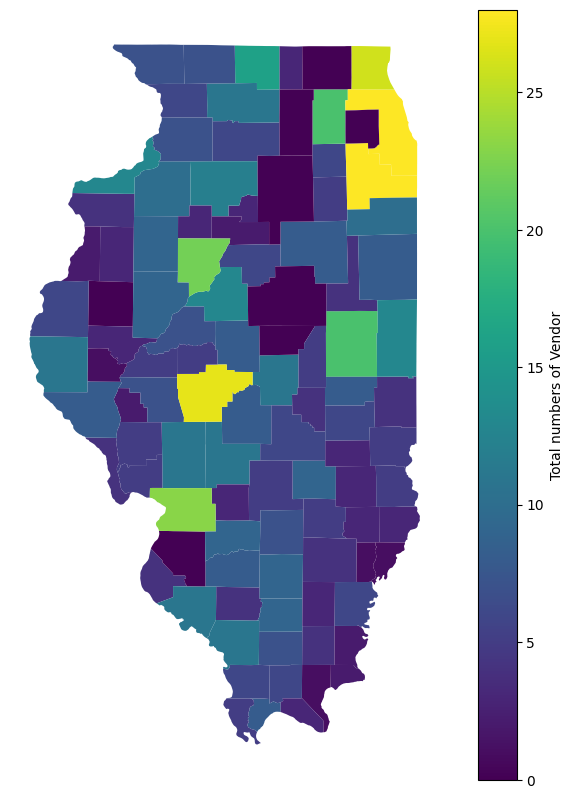

In [79]:
#then plot
fig, ax = plt.subplots(figsize=(10, 10))
shape_data_full.plot(ax=ax, column='Vendor ID',legend=True,figsize=(10,10), vmin = 0, vmax = 28, legend_kwds={'label': 'Total numbers of Vendor'})
ax.set_axis_off()

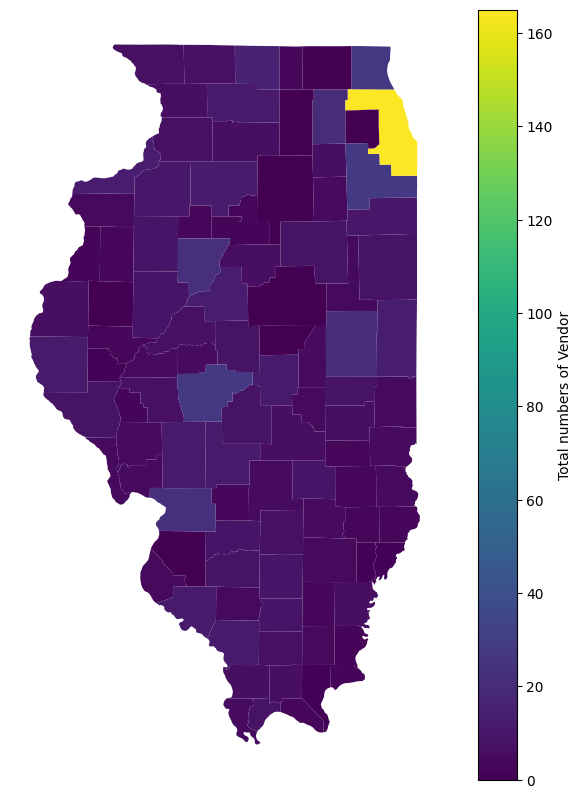

In [80]:
#then plot
fig, ax = plt.subplots(figsize=(10, 10))
shape_data_full.plot(ax=ax, column='Vendor ID',legend=True,figsize=(10,10), vmin = 0, vmax = 165, legend_kwds={'label': 'Total numbers of Vendor'})
ax.set_axis_off()

In [ ]:
#with urlopen('https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/il_illinois_zip_codes_geo.min.json') as response:
    #zipcodes = json.load(response)

In [74]:
'''
zip_code = []
for i in range(len(zipcodes['features'])):
    code = zipcodes['features'][i]['properties']['ZCTA5CE10']
    zip_code.append(code)
'''

"\nzip_code = []\nfor i in range(len(zipcodes['features'])):\n    code = zipcodes['features'][i]['properties']['ZCTA5CE10']\n    zip_code.append(code)\n"

In [75]:
#how to drop na for a column
#merged_df = merged_df.dropna(subset="Postal Code")